<a href="https://colab.research.google.com/github/ishantinsights/projects/blob/main/OTT_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

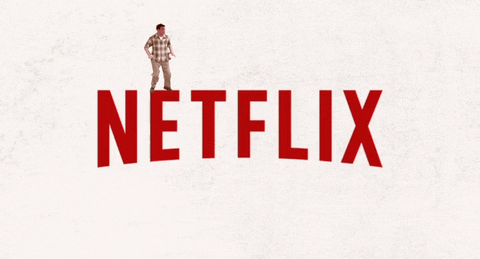

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Statement:** As a data analyst help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

**Basic Metrics:**

1.)Content Distribution:

--Explore the distribution of movies and TV shows in the datase
--Understand the ratio of movies to TV shows and how it has evolved over time
--Explore content production trends in different countries

2.) Release Trends:

--Analyze the number of movies and TV shows released per year over the recent years
-- Identify trends, peaks, or declines in content production
-- Analyis of release date and the actual date when it was added over the platform

3.) Audience Preferences:

--Which genre movies are more popular or produced more

4.) Actor and Director analysis:

-- Analysis of top directors and actors for movies and tv shows


<Font color='orange'>Business Insights and Recommendations added towards the end of this notebook




# **Step 1. Basic Data Checks**
1.)shape of data- Check the number of rows and columns in the dataset

2.)Missing values-Identify missing values/Null vlaues/NaN

3.)Data Types-Inspect the data types of each column





In [ ]:
df=pd.read_csv('/content/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# We will change the datatype of date_added column
df['date_added']=pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
df.isna().sum() # null values / missing values check

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<font color='orange'>null values column wise: Directors-30% ; Cast- 9% ; country-9% ; date_added- 0.1% ; rating and duration less than 0.1% . So we can drop null value rows in next step from columns having null values in the range of 0 to 1%

In [ ]:
df.dropna(subset=['date_added','duration','rating'],inplace=True)


# **Step 2.) Preprocessing/Data Cleaning and Basic analysis**

1.)In this Step we will clean the data and unnest the columns
cast,country,listed in and director
2.)explode the unnested columns
3.)replace the null values in categorical columns with unknowns
4.)then after unnesting basic analysis

In [ ]:
def unnest_cast(x):
  return str(x).split(', ')

df['Actor']=df['cast'].apply(unnest_cast)

In [ ]:
def unnest_director(x):
  return str(x).split(', ')
df['Director']=df['director'].apply(unnest_director)

In [ ]:
def unnest_country(x):
  return str(x).split(', ')
df['Country_Produced']=df['country'].apply(unnest_country)

In [ ]:
def unnest_listedin(x):
  return str(x).split(', ')

df['genre']=df['listed_in'].apply(unnest_listedin)
# by mistake duplicate columns so dropping in next step

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Actor,Director,Country_Produced,genre,year_added,month_added,day_of_week,week,quarter,difference_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,[nan],[Kirsten Johnson],[United States],[Documentaries],2021,September,Saturday,38,3,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[nan],[South Africa],"[International TV Shows, TV Dramas, TV Mysteries]",2021,September,Friday,38,3,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Julien Leclercq],[nan],"[Crime TV Shows, International TV Shows, TV Ac...",2021,September,Friday,38,3,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,[nan],[nan],[nan],"[Docuseries, Reality TV]",2021,September,Friday,38,3,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[nan],[India],"[International TV Shows, Romantic TV Shows, TV...",2021,September,Friday,38,3,0


**<font color='pink'>Basic Analysis**

In [ ]:
df1_Actor=df.explode('Actor')
df1_Actor['Actor']=df1_Actor['Actor'].str.replace('nan','Unknown Actor')
df1_Actor['Actor'].value_counts()



Unknown Actor            825
Anupam Kher               43
Shah Rukh Khan            35
Julie Tejwani             33
Takahiro Sakurai          32
                        ... 
Lee Han-wi                 1
Lee Jae-yoon               1
Ernest R. Dickerson        1
Jeon Hye-bin               1
Chittaranjan Tripathy      1
Name: Actor, Length: 36393, dtype: int64

<font color='orange'>Anupam kher has the highest content among actors followed by srk

In [ ]:
df1_Actor['Actor'].nunique()

36393

In [ ]:
df2_Country=df.explode('Country_Produced')
df2_Country['Country_Produced']=df2_Country['Country_Produced'].str.replace('nan','Unknown Country')
df2_Country['Country_Produced'].value_counts(normalize=True)



United States      0.339860
India              0.096601
Unknown Country    0.076561
United Kingdom     0.074160
Canada             0.041097
                     ...   
Bermuda            0.000092
Ecuador            0.000092
Armenia            0.000092
Mongolia           0.000092
Montenegro         0.000092
Name: Country_Produced, Length: 128, dtype: float64

<font color='orange'>
Insights: One third of the content is produced in United States followed by India and UK , each contributing to ~10%

In [ ]:
df2_Country['Country_Produced'].nunique()

128

<font color='orange'>Netflix produces content in 128 different countries across the globe!!

In [ ]:
df3_Director=df.explode('Director')
df3_Director['Director']=df3_Director['Director'].str.replace('nan','Unknown Director')
df3_Director['Director'].value_counts().head(30)



Unknown Director                2621
Rajiv Chilaka                     22
Jan Suter                         21
Raúl Campos                       19
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         15
Cathy Garcia-Molina               13
Martin Scorsese                   12
Youssef Chahine                   12
Jay Chapman                       12
Steven Spielberg                  11
Don Michael Paul                  10
Anurag Kashyap                     9
David Dhawan                       9
Yılmaz Erdoğan                     9
Shannon Hartman                    9
Ryan Polito                        8
Justin G. Dyck                     8
Hanung Bramantyo                   8
FerUnknown Directordo Ayllón       8
Kunle Afolayan                     8
Hakan Algül                        8
Troy Miller                        8
Johnnie To                         8
Umesh Mehra                        8
Robert Rodriguez                   8
L

In [ ]:
df3_Director['Director'].nunique()

4992

In [ ]:
df4_Genre=df.explode('genre')
df4_Genre['genre']=df4_Genre['genre'].str.replace('nan','Unknown Genre')
df4_Genre['genre'].value_counts(normalize=True).head()

International Movies      0.142635
Dramas                    0.125739
Comedies                  0.086763
International TV Shows    0.069918
Documentaries             0.045040
Name: genre, dtype: float64

In [ ]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month_name() # to extract the month in which content is added
df["day_of_week"]=df['date_added'].dt.day_name() # to extract the day name


# **Step 3: Exploratory Data Analysis**

# <font color='pink'>**Content Types**

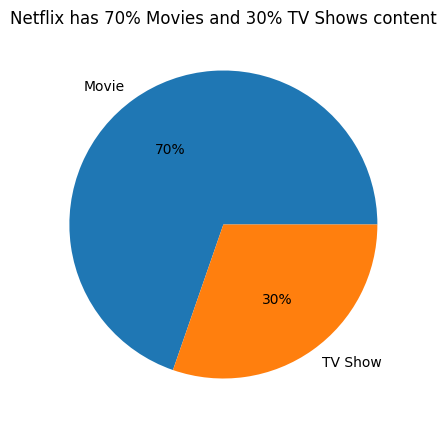

In [ ]:
type=df['type'].value_counts().index
value=df['type'].value_counts().values
plt.figure(figsize=(8,5))
plt.pie(value,labels=type,autopct='%.0f%%')
plt.title("Netflix has 70% Movies and 30% TV Shows content")
plt.savefig("content_type.jpg")
plt.show()


# **<font color='pink'>Comparison of TV shows and Movies**

In this section we will explore:

1.) Trend of movies and tv shows over years

2.)Top 10 countries where movies are produced the most

3.)Top 10 countries where tv shows are produced the most

4.) Movie Duration distribution and top 3 countries movie duration as to what would be the ideal movie duration to produce going forward

5.) TV shows season preference as to how many seasons would be more preferable to produce going forward







In [ ]:
## We group the data by  year and type to check the count of content type year wise
df_year_type_group=df.groupby(by=['year_added','type'])['title'].count().reset_index()
df_year_type_group.head()

,year_added,type,title
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13


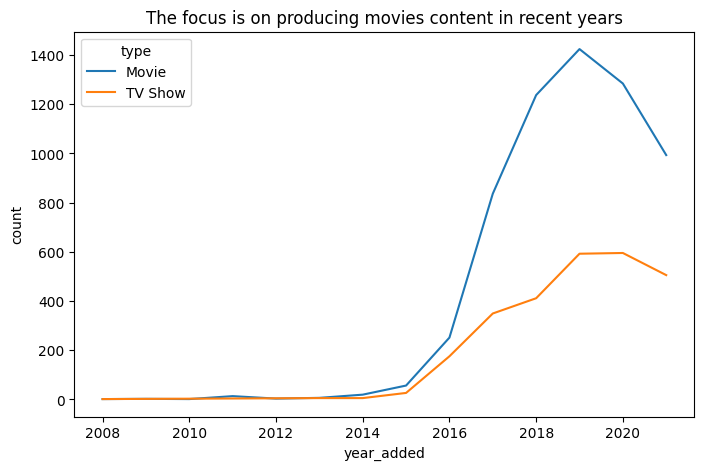

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.lineplot(data=df_year_type_group,x='year_added',y='title',hue='type')
plt.title("The focus is on producing movies content in recent years")
plt.ylabel('count')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig("YOY Trend.jpg") # method to save as jpg

In [ ]:
# filter the data for movies
df2_movies=df2_Country[df2_Country['type']=='Movie']

# group the data by country and count the movies year wise
df2_country_movie=df2_movies.groupby(by='Country_Produced')['title'].count().sort_values(ascending=False).head(10).reset_index()
df2_country_movie

,Country_Produced,title
0,United States,2748
1,India,962
2,United Kingdom,532
3,Unknown Country,439
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114


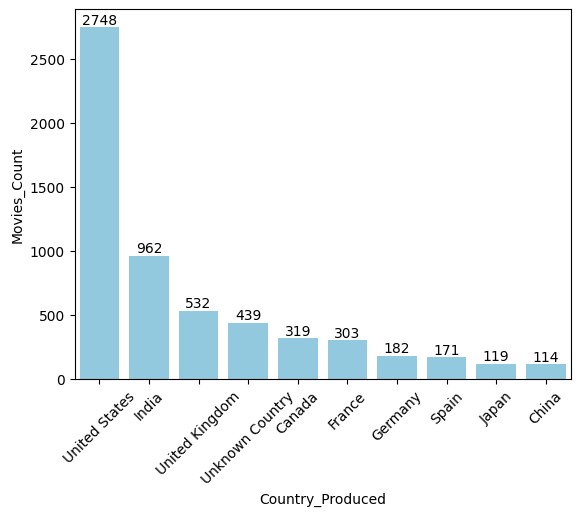

In [ ]:
ax=sns.barplot(data=df2_country_movie,x='Country_Produced',y='title',color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Movies_Count')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<font color='orange'>
Insights:
United States is the most preferred country to produce movies followed by India and United Kingdom

In [ ]:
# filter the data for tv show
df2_tv_show=df2_Country[df2_Country['type']=='TV Show']

# group the data by country to get the country wise count of tv shows
df2_country_TV=df2_tv_show.groupby(by='Country_Produced')['title'].count().sort_values(ascending=False).head(10).reset_index()
df2_country_TV

,Country_Produced,title
0,United States,932
1,Unknown Country,390
2,United Kingdom,271
3,Japan,197
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,64


<font color='orange'>Insights:
TV Shows are predominantly produced in United States followed by United Kingdom and Japan

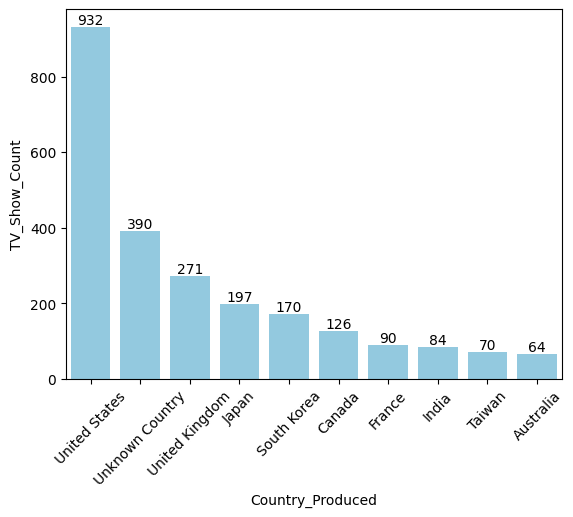

In [ ]:

ax=sns.barplot(data=df2_country_TV,x='Country_Produced',y='title',color='skyblue')
plt.xticks(rotation=46)
plt.ylabel('TV_Show_Count')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

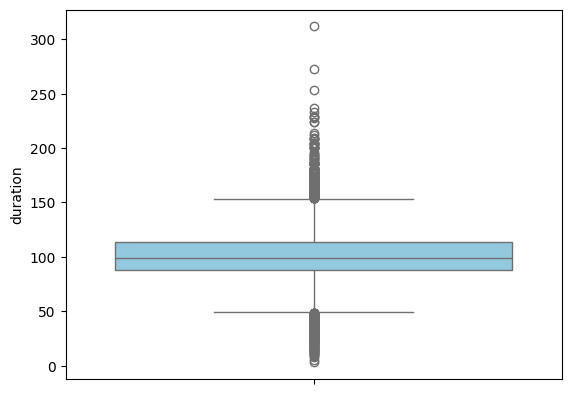

In [ ]:
#Lets check the movie length distribution across movies for the whole dataset and then will dissect the movie length produced for top 3 countries
df2_movies=df2_movies.replace('\smin','',regex=True) ## to separate the text from numbers
df2_movies['duration']=df2_movies['duration'].astype(int) ## to convert the string to integer
ax=sns.boxplot(data=df2_movies,y='duration',color='skyblue')



<font color='orange'>Insights:
So from the graph it seems to be normal distribution with median movie length ~ 90 min and 50% of the movies are between ~90min to ~120min. So going forward netflix should keep the movie length in this range. Movie duration beyond 170min is outlier and below 50min is outlier so netflix should avoid adding movies of these duration

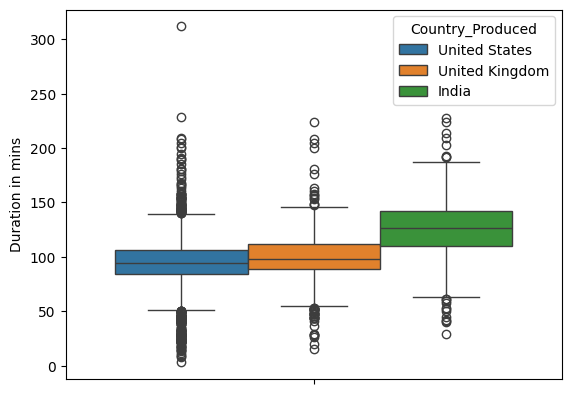

In [ ]:
# now deep dive the same for top 3 countries , lets check how netflix play their content strategy for top 3 countries
# what is movie duration they keep for top 3 countries
top_3_movie_country=df2_movies['Country_Produced'].value_counts().index[:3] ## to get the top3 countries
sns.boxplot(data=df2_movies[df2_movies['Country_Produced'].isin(top_3_movie_country)],y='duration',hue='Country_Produced')
plt.ylabel("Duration in mins")
plt.savefig("movies_duration_distribution.jpg")

<font color='orange'>Insights:
1.)The median movie duration in India is highest ~130min , Netflix should consider this while adding new movies in India
2.)The median movie duration is lowest for United States ~ 90 mins
3.) 50% of movies in India are produced in the range of ~110min to ~140min





In [ ]:
#Lets check the season length distribution across movies for the whole dataset
#and then will dissect the count of season preference (how many seasons) produced for top 3 countries

df2_tv_show=df2_tv_show.replace('\ Seasons','',regex=True) # to separate season string and numeric season number

df2_tv_show=df2_tv_show.replace('\ Season','',regex=True) # to separate season string and numeric season number
df2_tv_show['duration']=df2_tv_show['duration'].astype(int) # to convert string to int




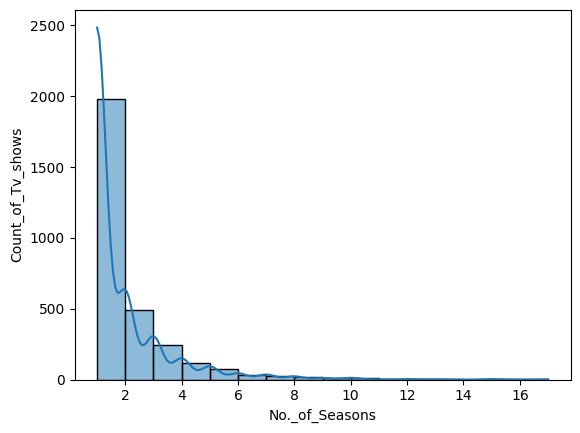

In [ ]:
# Distribution of season length across the whole dataset
ax=sns.histplot(data=df2_tv_show,x='duration',bins=16,kde=True)
plt.ylabel('Count_of_Tv_shows')
plt.xlabel("No._of_Seasons")
plt.savefig("Season_preference.jpg")

<font color='orange'>Insights:

<font color='orange'>Most preferred duration in terms of seasons for Tv shows is 1-2 seasons . Netflix should keep this in mind while producing future Tv shows



<Font color='pink'> **Actor and Director Analysis**

In [ ]:
# Top 10 Directors directors who have appeared in most movies
df3_Director[df3_Director['type']=='Movie'].groupby(by='Director')['title'].aggregate(['count']).reset_index().sort_values(by='count',ascending=False).head(10)


,Director,count
4537,Unknown Director,187
3580,Rajiv Chilaka,22
1816,Jan Suter,21
3631,Raúl Campos,19
4259,Suhas Kadav,16
2737,Marcus Raboy,15
1861,Jay Karas,15
726,Cathy Garcia-Molina,13
2813,Martin Scorsese,12
1858,Jay Chapman,12


In [ ]:
# Top 10 Directors directors who have appeared in most Tv shows
df3_Director[df3_Director['type']=='TV Show'].groupby(by='Director')['title'].aggregate(['count']).reset_index().sort_values(by='count',ascending=False).head(10)

,Director,count
284,Unknown Director,2434
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
103,Iginio Straffi,2
168,Lynn Novick,2
251,Shin Won-ho,2


In [ ]:
#Top 10 Actors who have appeared in most movies
df1_Actor[df1_Actor['type']=='Movie'].groupby(by='Actor')['title'].aggregate(['count']).reset_index().sort_values(by='count',ascending=False).head(10)


,Actor,count
24453,Unknown Actor,475
2102,Anupam Kher,42
21774,Shah Rukh Khan,35
17187,Naseeruddin Shah,32
668,Akshay Kumar,30
18058,Om Puri,30
12026,Julie Tejwani,28
1341,Amitabh Bachchan,28
18322,Paresh Rawal,28
20685,Rupa Bhimani,27


In [ ]:
#Top 10 Actors who have appeared in most TV Shows
df1_Actor[df1_Actor['type']=='TV Show'].groupby(by='Actor')['title'].aggregate(['count']).reset_index().sort_values(by='count',ascending=False).head(10)


,Actor,count
13833,Unknown Actor,350
13172,Takahiro Sakurai,25
14520,Yuki Kaji,19
6772,Junichi Suwabe,17
2863,Daisuke Ono,17
253,Ai Kayano,16
14504,Yuichi Nakamura,16
14436,Yoshimasa Hosoya,15
6729,Jun Fukuyama,15
3113,David Attenborough,14


<font color='pink'>**Time Analysis**

1.)best week to release the Tv-show or the movie
2.)best month to release the Tv-show or the movie

In [ ]:
df['week']=df['date_added'].dt.week
df_movie=df[df['type']=='Movie'] # to filter out only movies data from the dataset
df_movie_week=df_movie.groupby(by='week')['type'].count()
df_movie_week.reset_index().sort_values(by='type',ascending=False).head()

<ipython-input-52-93df1205defe>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['date_added'].dt.week


,week,type
0,1,316
43,44,243
39,40,215
8,9,206
25,26,195


In [ ]:
df['quarter']=df['date_added'].dt.quarter # to get the quarter
df_movie.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Actor,Director,Country_Produced,genre,year_added,month_added,day_of_week,week,quarter,difference_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,[nan],[Kirsten Johnson],[United States],[Documentaries],2021,September,Saturday,38,3,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,...,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...","[Robert Cullen, José Luis Ucha]",[nan],[Children & Family Movies],2021,September,Friday,38,3,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,...,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",[Haile Gerima],"[United States, Ghana, Burkina Faso, United Ki...","[Dramas, Independent Movies, International Mov...",2021,September,Friday,38,3,28
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",[Theodore Melfi],[United States],"[Comedies, Dramas]",2021,September,Friday,38,3,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,...,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...",[Christian Schwochow],"[Germany, Czech Republic]","[Dramas, International Movies]",2021,September,Thursday,38,3,0


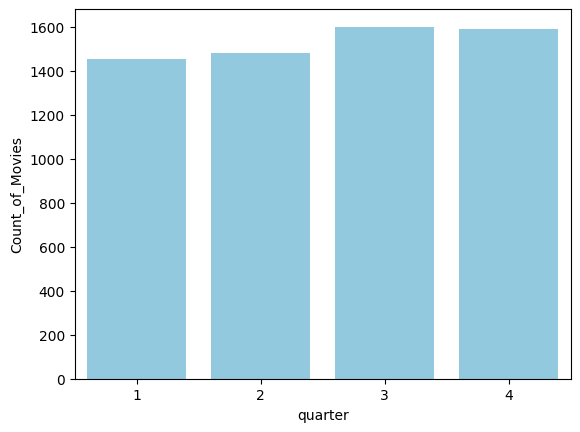

In [ ]:
sns.countplot(data=df[df['type']=='Movie'],x='quarter',color='skyblue')
plt.ylabel("Count_of_Movies")
plt.savefig('movie_quarter.jpg')

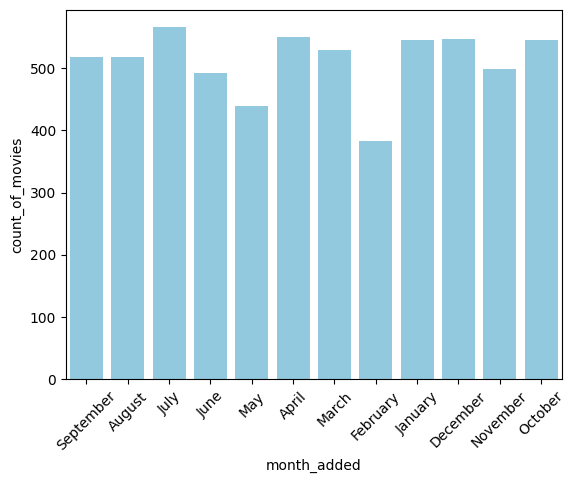

In [ ]:
sns.countplot(data=df_movie,x='month_added',color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("count_of_movies")
plt.show()

**<font color='orange'>Insights**
1.) Best week to add a movie is week 1 followed by week 44 and week 40

<font color='orange'>(2) Best over all quarter to add movies is Q3 and

<font color='orange'>(3.) Best  month to add movies is July


In [ ]:
# to check best week /quarter and month for tv shows
df_tv=df[df['type']=='TV Show'] # to filter out only TV shows data from the dataset
df_tv_week=df_tv.groupby(by='week')['type'].count()
df_tv_week.reset_index().sort_values(by='type',ascending=False).head()


,week,type
26,27,86
30,31,83
12,13,76
43,44,75
23,24,75


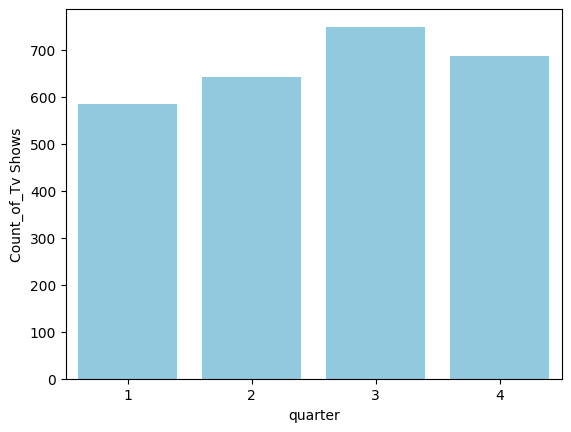

In [ ]:
sns.countplot(data=df_tv,x='quarter',color='skyblue')
plt.ylabel("Count_of_Tv Shows")
plt.savefig('tv_quarter.jpg')

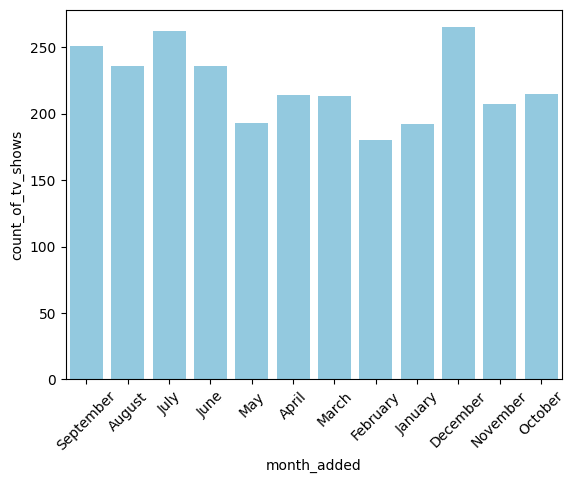

In [ ]:
sns.countplot(data=df_tv,x='month_added',color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("count_of_tv_shows")
plt.show()

<font color='orange'>Insights

<font color='orange'>1.) Best week to add a tv show is week 27 followed by week 31 and week 13

<font color='orange'>2) Best  quarter to add tv shows is Q3

<font color='orange'>3.) Best months to add tv shows are December and July

In [ ]:
df['difference_year']=df['year_added']-df['release_year'] # to check after how many years movies are added in netflix post release
df['difference_year'].mode()

0    0
Name: difference_year, dtype: int64

**<font color='orange'>Insights:**
 Most of the  content is added the same year in which they are launched  as mode of difference is zero



In [ ]:
release_year_added_crosstab=pd.crosstab(index=df['release_year'],columns=df['year_added'],margins=True)
release_year_added_crosstab # to check how are the movies added w.r.t to release year

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,All
release_year,,,,,,,,,,,,,,,
1925,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1942,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2
1943,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3
1944,0,0,0,0,0,0,0,0,0,3,0,0,0,0,3
1945,0,0,0,0,0,0,0,0,0,3,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0,0,0,0,0,0,0,0,1,1,561,370,139,74,1146
2019,0,0,0,0,0,0,0,0,0,0,3,667,262,98,1030
2020,0,0,0,0,0,0,0,0,0,0,0,4,777,172,953


<font color='orange'>Insights:

<font color='orange'>Few of the TV shows are added over Netflix before release

**<font color='pink'>Genre Analysis**

In [ ]:
# Lets deep dive and check how is the Genre movement of top 5 genres over the last 5-6 years(baisis released date) , is there any significant change or shift in genre type
# so we will first check the top 5 genre
top_5_genre=df4_Genre['genre'].value_counts().index[:5]
df4_top_genre=df4_Genre[df4_Genre['genre'].isin(top_5_genre)]

(2011.0, 2021.0)

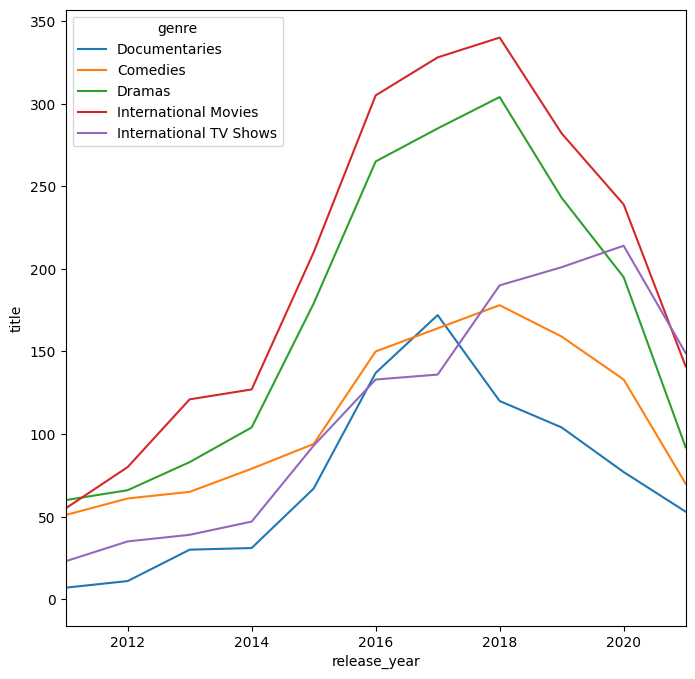

In [ ]:
genre_year=df4_top_genre.groupby(by=['release_year','genre'])['title'].count().reset_index()
plt.figure(figsize=(8,8))
sns.lineplot(data=genre_year,x='release_year',y='title',hue='genre')
plt.xlim(2011,2021) # check the movement in last 10 years

<font color='orange'>Insights

<font color='orange'>1.)International Movies category dominates throughout

<font color='orange'>2.)International shows started coming into limelight from year 2016 onwards

<font color='orange'>3.) Comedy genre has shown downward trend

<font color='orange'>4.)Documentry genre started picking up in year ~2016-2017 but lost traction thereafter

In [ ]:
df4_Genre['genre'].value_counts(normalize=True).head()

International Movies      0.142635
Dramas                    0.125739
Comedies                  0.086763
International TV Shows    0.069918
Documentaries             0.045040
Name: genre, dtype: float64

<font color='orange'>Insights

<font color='orange'>Top 3 Genres over Netflix are International Movies,Dramas and Comedies so netflix should add/produce content around this

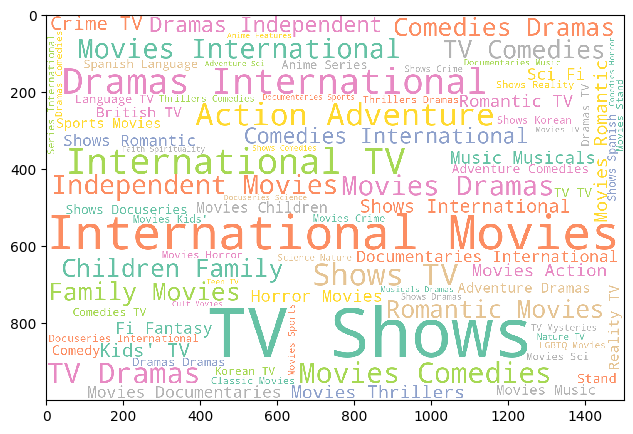

In [ ]:
# WordCloud to check the popular genre
from wordcloud import WordCloud
genre=df4_Genre['genre']
plt.figure(figsize=(8,5))
wordcloud = WordCloud(width=1500 , height=1000,background_color="White",min_font_size =20,colormap="Set2").generate('  '.join(genre))
plt.imshow(wordcloud,interpolation='nearest')

plt.savefig('wordcloud.jpg')


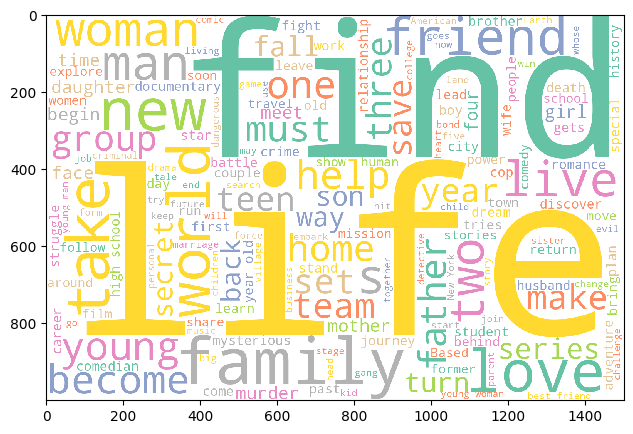

In [ ]:
# WordCloud to check the popular keywords in description of movie/Tvshow
from wordcloud import WordCloud
description=df['description']
plt.figure(figsize=(8,5))
wordcloud = WordCloud(width=1500 , height=1000,background_color="White",min_font_size =20,colormap="Set2").generate('  '.join(description))
plt.imshow(wordcloud,interpolation='nearest')



<font color='orange'>Insights:

<font color='orange'>As seen from the above word cloud most popular keywords are "Life","Love","friend", "father" ,"family" so netflix should focus on content around this keywords


**<Font color='pink'>Country Specific Genre Analysis for India and United States**

In [ ]:
# Lets first check for Bharat i.e India
country_genre_group=df4_Genre.explode('Country_Produced').groupby(by=['Country_Produced','genre'])['title'].aggregate(['count'])
country_genre_group.reset_index().set_index('Country_Produced').loc['India'].sort_values(by='count',ascending=False).head()

,genre,count
Country_Produced,,
India,International Movies,864
India,Dramas,662
India,Comedies,323
India,Independent Movies,167
India,Action & Adventure,137


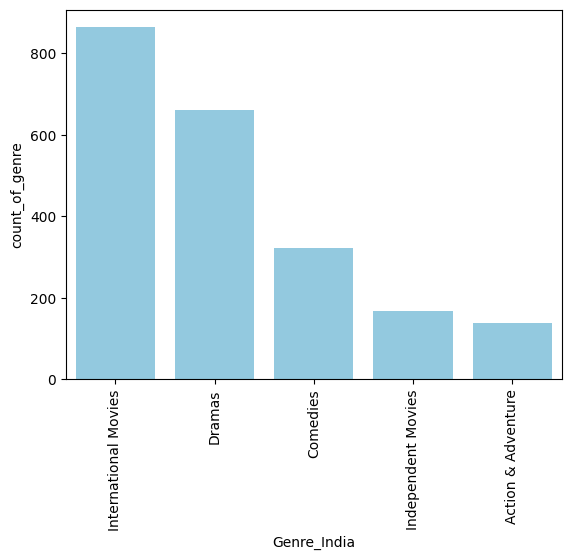

In [ ]:
sns.barplot(data=country_genre_group.reset_index().set_index('Country_Produced').loc['India'].sort_values(by='count',ascending=False).head(),x='genre',y='count',color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('count_of_genre')
plt.xlabel("Genre_India")
plt.show()

<font color='orange'>Insights: Top 5 Genres for India are : International Movies , Dramas, Comedies , Independent Movies and Action  

In [ ]:
# Lets check for United States also

country_genre_group.reset_index().set_index('Country_Produced').loc['United States'].sort_values(by='count',ascending=False).head()


,genre,count
Country_Produced,,
United States,Dramas,835
United States,Comedies,680
United States,Documentaries,511
United States,Action & Adventure,404
United States,Independent Movies,390


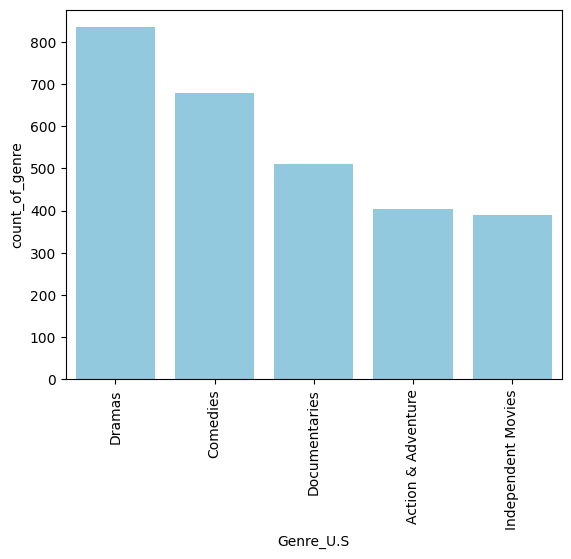

In [ ]:
sns.barplot(data=country_genre_group.reset_index().set_index('Country_Produced').loc['United States'].sort_values(by='count',ascending=False).head(),x='genre',y='count',color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('count_of_genre')
plt.xlabel("Genre_U.S")
plt.show()

<font color='orange'>Insights: Top 5 Genres for United States are :Dramas, Comedies , Documentries, Independent Movies and Action

<font color='yellow'>Business Insights and Recommendations


🔍<font color='orange'>**Content Production Distribution:**

▶Insight:One-third of the content is produced in the United States, followed by India and the UK, each contributing to ~10%.

▶Recommendation:Acknowledge the importance of these key production hubs while maintaining a global approach to content creation. Consider enhancing partnerships and collaborations in these regions.

**🔍<font color='orange'>Content Type Distribution:**

▶Insight: Netflix has 70% movies and 30% TV shows content, with a recent focus on producing more movies

▶Recommendation: Continue the emphasis on movie production but maintain a balanced portfolio to cater to diverse viewer preferences.

**🔍<font color='orange'>Country-Specific Content Insights:**

▶Insight: United States is the most preferred country to produce movies, while TV shows are predominantly produced in the United States, followed by the United Kingdom and Japan

▶Recommendation: Leverage the success of content production in the United States and explore opportunities for TV show production in the United Kingdom and Japan.

**🔍<font color='orange'>Movie Duration Insights:**

▶Insight: Movie duration follows a normal distribution with a median around 90 minutes. The majority of movies fall within the range of 90 to 120 minutes

▶Recommendation: Keep movie lengths within this range for optimal audience engagement, avoiding outliers below 50 minutes and beyond 170 minutes.

**🔍<font color='orange'>Regional Movie Duration Variations:**

▶Insights:

The median movie duration in India is highest (~130 mins).

The median movie duration is lowest for the United States (~90 mins).

50% of movies in India are produced in the range of ~110 mins to ~140 mins

▶Recommendations: Consider regional preferences in movie duration, adapting content lengths for maximum viewer satisfaction.

 **🔍<font color='orange'>TV Show Season Duration Insights:**

▶Insight: The most preferred duration for TV shows is 1-2 seasons

▶Recommendation: Keep TV show seasons within this range for optimum viewer engagement

**🔍<font color='orange'>Optimal Timing for Content Addition:**

▶Insights:
Best weeks to add movies are week 1, week 44, and week 40.

Best overall quarter to add movies is Q3.

Best month to add movies is July.

▶Recommendation: Plan content releases strategically during these periods to maximize viewership.

**🔍<font color='orange'>Content Addition Trends**:

▶Insight: Most of the content is added the same year in which they are launched.

▶Recommendation: Continue the current trend of adding content promptly after launch to keep the platform fresh and up-to-date.

**🔍<font color='orange'>Genre Popularity Trends:**

▶Insights:
International Movies dominate consistently.

International shows gained popularity from 2016 onwards.

Comedy genre has shown a downward trend, while Documentaries gained traction around 2016-2017 but lost momentum thereafter.

▶Recommendation: Make an effort to revive the comedy genre, concentrate on genres that have maintained their appeal throughout time, and investigate prospects in the documentary genre.

**🔍<font color='orange'>Keyword Analysis for Popular Content:**

▶Insight: Most popular keywords are "Life," "Love," "Friend," "Father," and "Family.
"
▶Recommendation: Focus content creation around these keywords to resonate with audience sentiments and enhance viewer connection.

**🔍<font color='orange'>Top 5 Genres for India and the United States:**

▶Insights:
India: International Movies, Dramas, Comedies, Independent Movies, and Action.
United States: Dramas, Comedies, Documentaries, Independent Movies, and Action.

▶Recommendation: Tailor content offerings in each region based on the identified top genres, ensuring content aligns with local preferences.

























